<a href="https://colab.research.google.com/github/Quantum00000/Machine_Learning_And_AI/blob/main/step_1_part_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]

df = pd.read_csv("SeoulBikeData.csv",encoding='latin1').drop(["Date","Holiday","Seasons"],axis=1)

df.columns=dataset_cols

df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]


In [5]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


/tmp/ipython-input-411540638.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


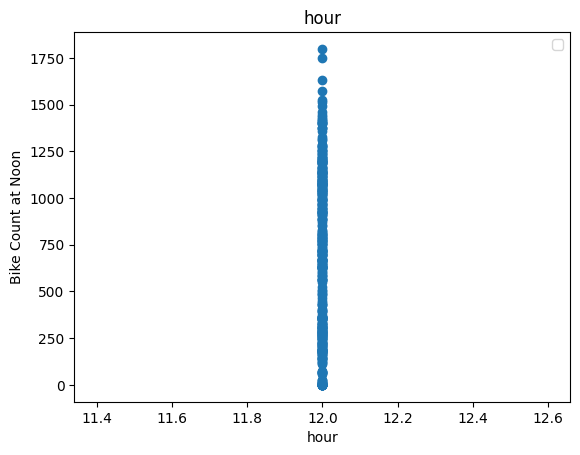

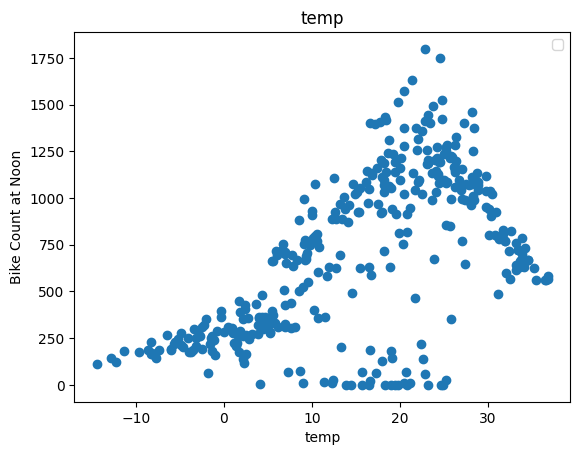

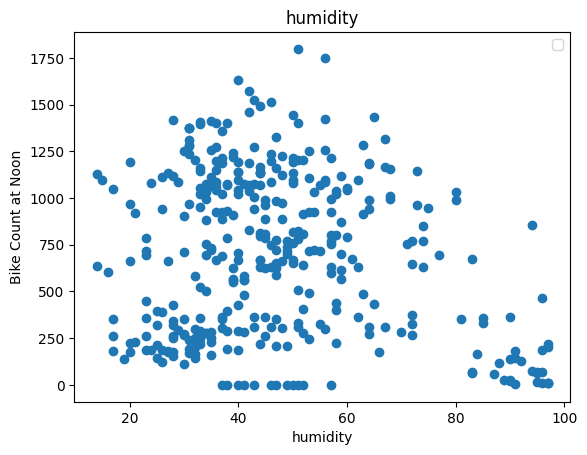

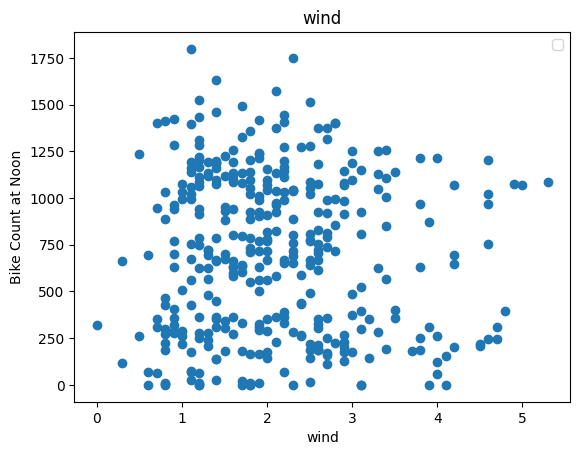

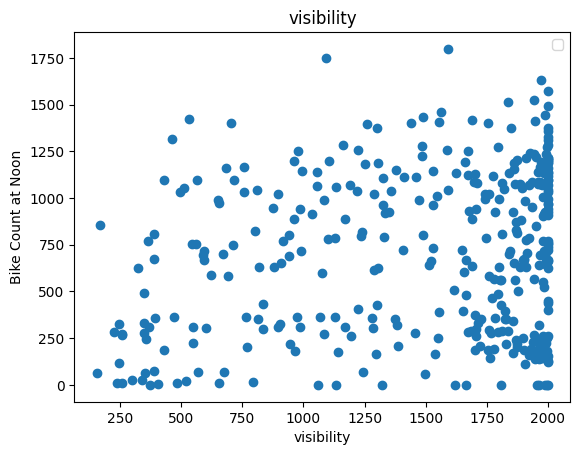

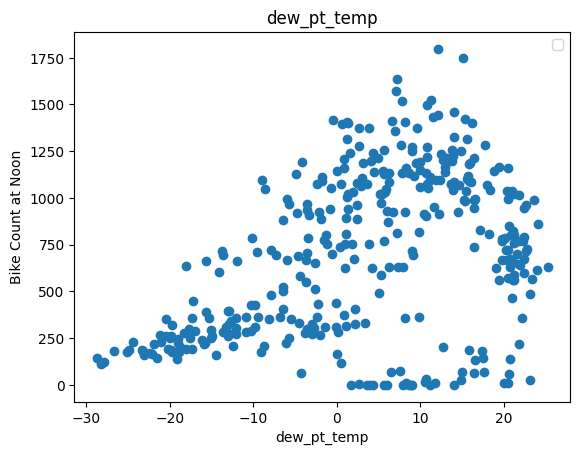

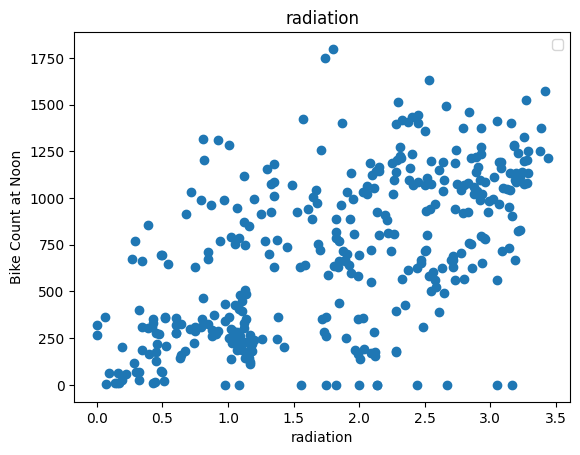

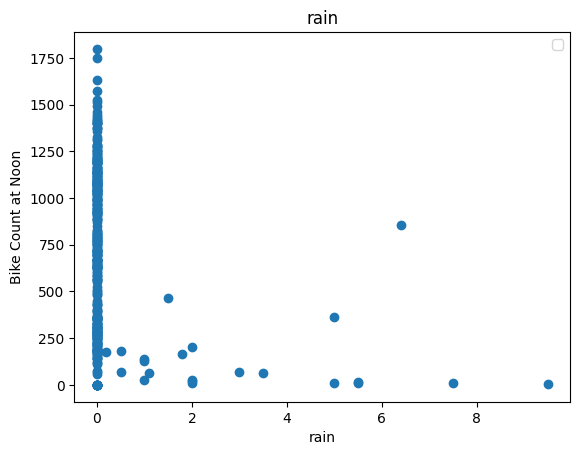

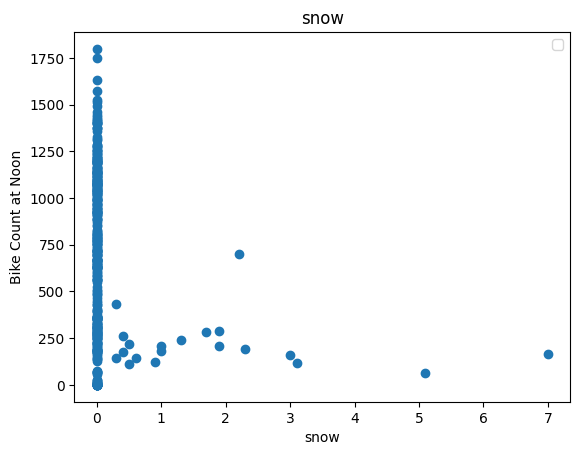

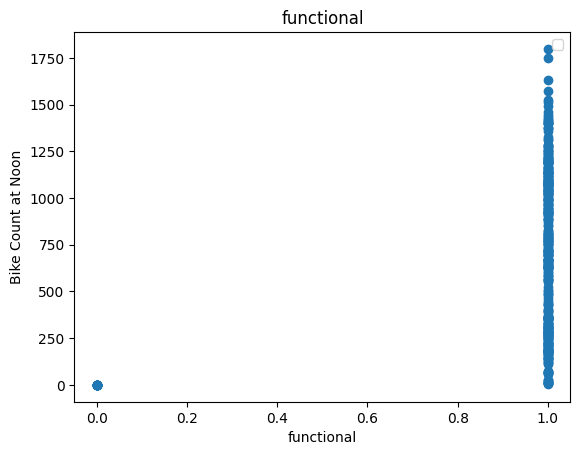

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train/Valid/Test Dataset

In [7]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)) ,int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def get_xy(Dataframe,y_label,X_labels=None):
  dataframe =copy.deepcopy(Dataframe)
  if X_labels is None:
    X= dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(X_labels)==1:
      X=dataframe[X_labels].values
    else:
      X =dataframe[X_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data =np.hstack((X,y))
  #preprocessed x and y
  return data,X,y

In [9]:
_,X_train_temp,y_train_temp= get_xy(train,"bike_count",X_labels=["temp"])
_,X_val_temp,y_val_temp= get_xy(val,"bike_count",X_labels=["temp"])
_,X_test_temp,y_test_temp= get_xy(test,"bike_count",X_labels=["temp"])

In [10]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [11]:
temp_reg.score(X_test_temp,y_test_temp)

0.317047656953081

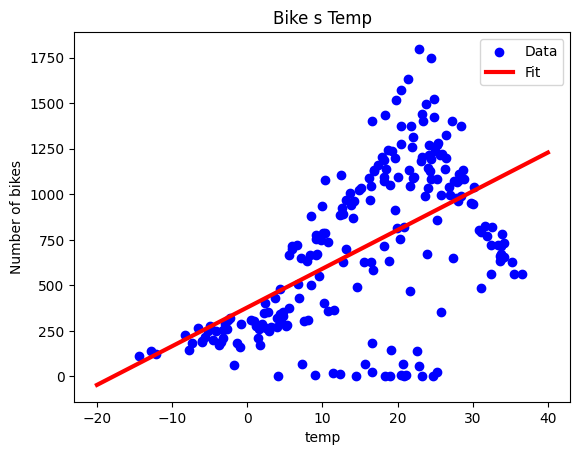

In [12]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
X= tf.linspace(-20, 40, 100)
plt.plot(X, temp_reg.predict(np.array(X).reshape(-1,1)),label="Fit", color="red" ,linewidth=3)
plt.legend()
plt.title("Bike s Temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()


# **Multiple Linear regression**

In [13]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional'],
      dtype='object')

In [14]:
_,X_train_all,y_train_all= get_xy(train,"bike_count",df.columns[1:])
_,X_val_all,y_val_all= get_xy(val,"bike_count",df.columns[1:])
_,X_test_all,y_test_all= get_xy(test,"bike_count",df.columns[1:])

In [15]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [16]:
all_reg.score(X_test_all,y_test_all)

0.5877723865782387

# **Regression With Neural Net**

In [17]:
temp_normalizer = tf. keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
temp_nn_model= tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [19]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
history= temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    epochs=1000,verbose=0,validation_data=(X_val_temp.reshape(-1),y_val_temp)
)

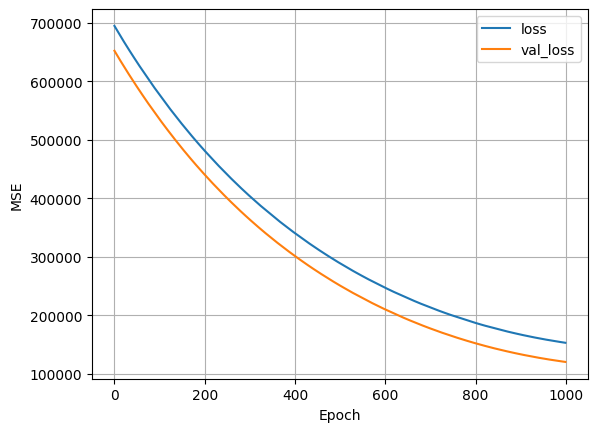

In [22]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


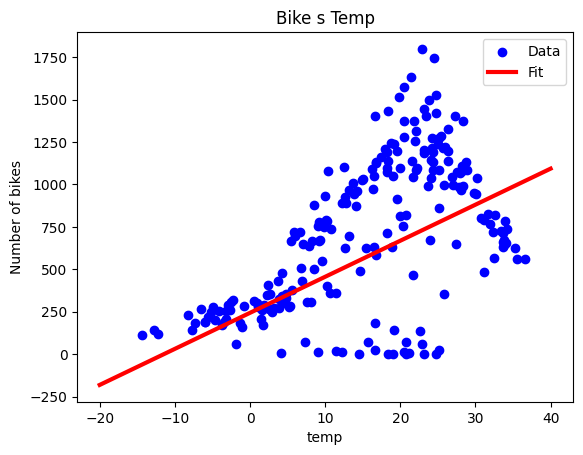

In [23]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
X= tf.linspace(-20, 40, 100)
plt.plot(X, temp_nn_model.predict(np.array(X).reshape(-1,1)),label="Fit", color="red" ,linewidth=3)
plt.legend()
plt.title("Bike s Temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()


In [24]:
temp_nn_model.evaluate(X_test_temp.reshape(-1),y_test_temp)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 123614.3125


121414.78125

# **Neural net**

In [25]:
temp_normalizer = tf. keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [26]:
history=nn_model.fit(X_train_temp,y_train_temp,validation_data=(X_val_temp,y_val_temp),epochs=1000,verbose=0)

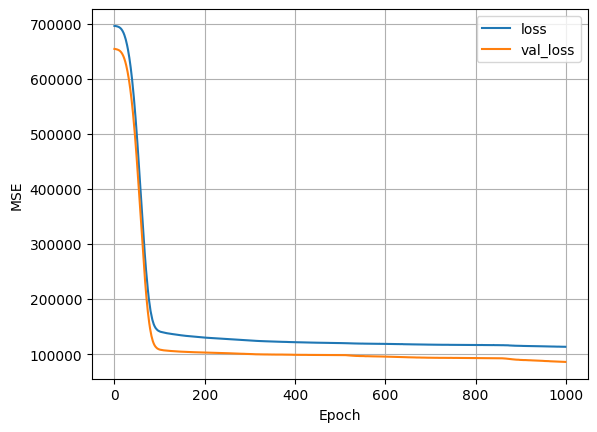

In [27]:
plot_loss(history)

Neural net for all data

In [28]:
all_normalizer = tf. keras.layers.Normalization(input_shape=(X_train_all.shape[1],),axis=-1)
all_normalizer.adapt(X_train_all)

In [29]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [30]:
all_data_history=nn_model.fit(X_train_all,y_train_all,validation_data=(X_val_all,y_val_all),epochs=100,verbose=0)

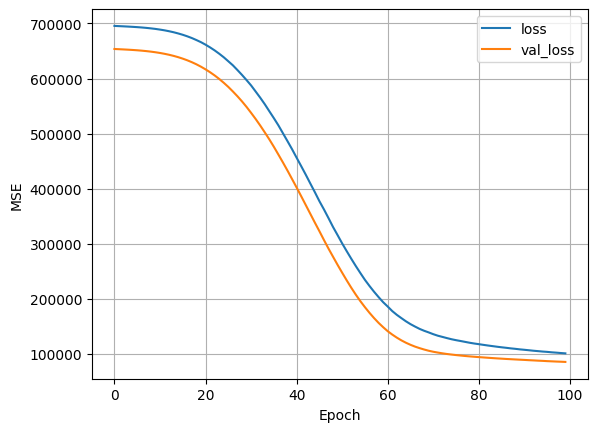

In [31]:
plot_loss(all_data_history)

calculate MSE for both linear reg and nn

In [32]:
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [33]:
def MSE(y_pred,y_real):
  return(np.square(y_pred-y_real)).mean()

In [34]:
print(MSE(y_pred_lr,y_test_all))
print(MSE(y_pred_nn,y_test_all))

66872.33994407706
85254.21355675021


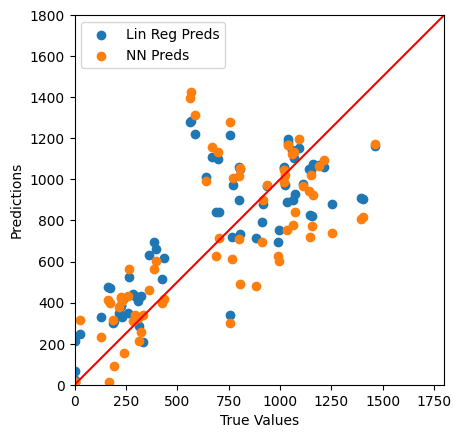

In [35]:
ax=plt. axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lr,label='Lin Reg Preds')
plt.scatter(y_test_all,y_pred_nn,label='NN Preds')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c='red')